In [1]:
import numpy as np
import cv2,os
import matplotlib.pyplot as plt

In [2]:
# date of data
date = "0913"
data_dir = "./2023%s"%date

cam_H, cam_W = 768, 1024
wvls = np.arange(420, 670, 10)
wvls = np.delete(wvls, -4)

### images captured for each orders

In [3]:
# -1 order list
mfirst = []
mfirst_dir = os.path.join(data_dir, "%snm_mfirst/calibration00/capture_0000.png")

# +1 order
pfirst = []
pfirst_dir = os.path.join(data_dir, "%snm_pfirst/calibration00/capture_0000.png")

# zero order
zero = []
zero_dir = os.path.join(data_dir, "%snm_zero/calibration00/capture_0000.png")

wvl_imgs = np.zeros(shape=(len(wvls), cam_H, cam_W, 3))

for w in range(len(wvls)):
    mfirst.append(np.array(cv2.imread(mfirst_dir%wvls[w])[:,:,::-1]/255.))
    pfirst.append(cv2.imread(pfirst_dir%wvls[w])[:,:,::-1]/255.)
    zero.append(cv2.imread(zero_dir%wvls[w])[:,:,::-1]/255.)

mfirst = np.array(mfirst)
pfirst = np.array(pfirst)
zero = np.array(zero)

In [4]:
zero.shape

(24, 768, 1024, 3)

### Centers

In [6]:
# patch sizes for each orders and wvls
patch_size = np.zeros(shape = (len(wvls), 3), dtype = np.int16)
patch_size[:,:] = 20
patch_size[16, 2], patch_size[17, 2], patch_size[-1, 2], patch_size[-1, 0] = 15, 15, 15, 15

# zero patch size
p_size = 20

# zero order center point
zero_center = np.zeros(shape = (len(wvls), 2), dtype = np.int16)
zero_center[:18] = np.array([545, 568]) # ~ 590nm 까지의 center point
zero_center[18:] = np.array([472, 560]) # 600nm ~ 부터의 center point

# +1 order center point
pfirst_center = np.zeros(shape=(len(wvls), 2), dtype = np.int16)
pfirst_center[:10] = np.array([545, 568])
pfirst_center[10:] = np.array([[540, 567],[527, 565],[528, 564], [520,564],[516,561],
                          [514,564],[507,562],[503,561],[472,560],[461,556],[455,555],
                          [505,559],[510,558],[515,558]])

# -1 order center point
mfirst_center = np.zeros(shape=(len(wvls), 2), dtype = np.int16)
mfirst_center[:18] = np.array([545, 568])
mfirst_center[18:] = np.array([[469, 556],[493,557],[498,558],[447,556],[443,558],[436,554]])

### visualization

c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


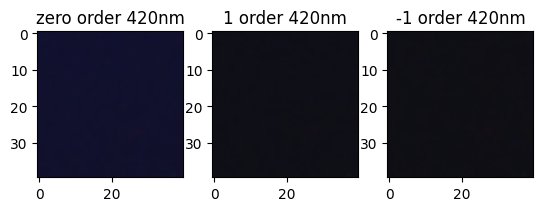

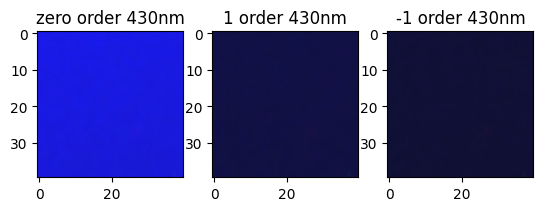

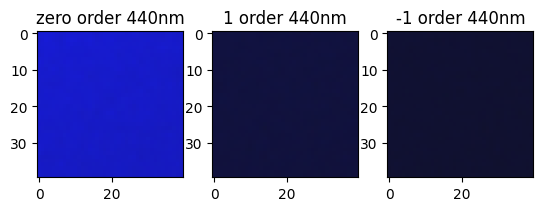

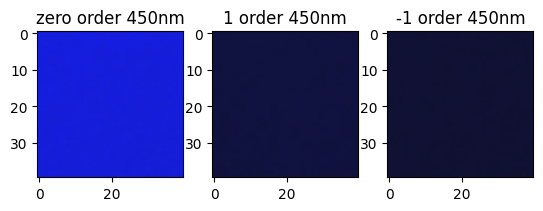

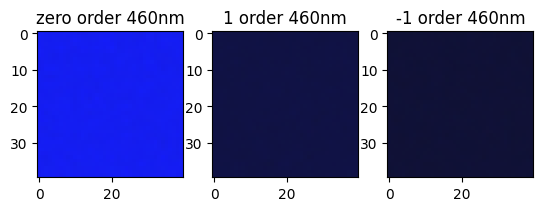

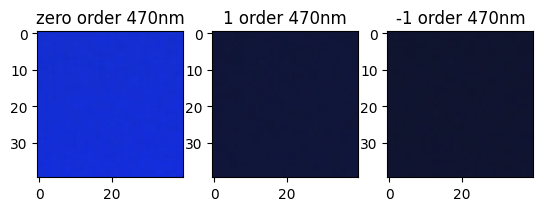

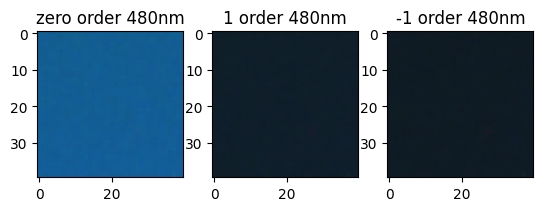

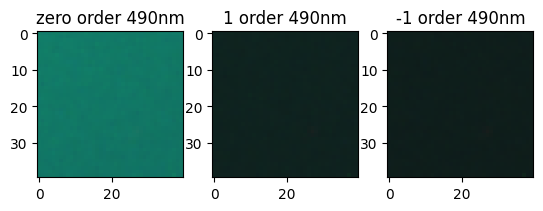

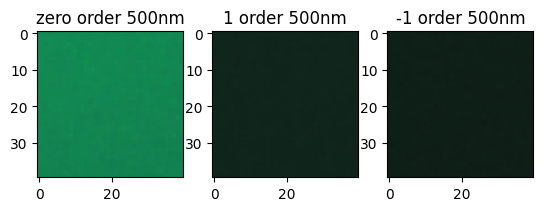

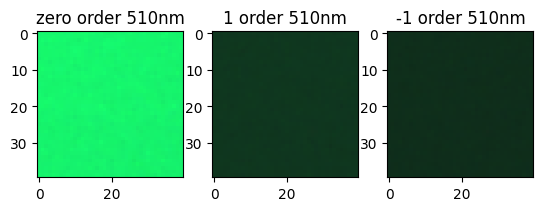

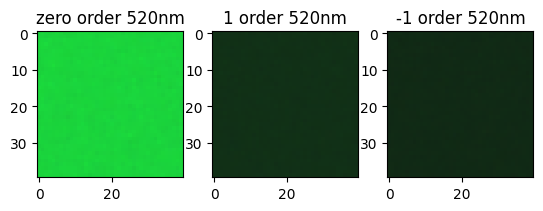

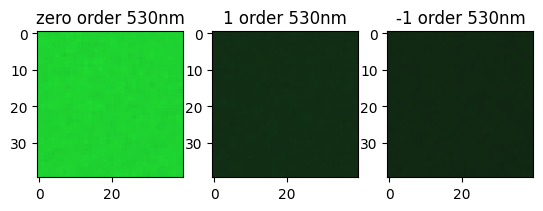

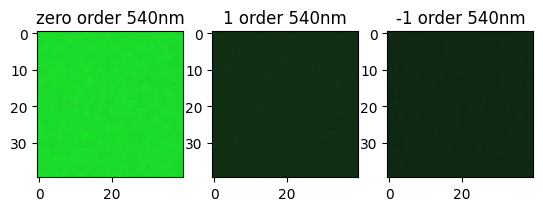

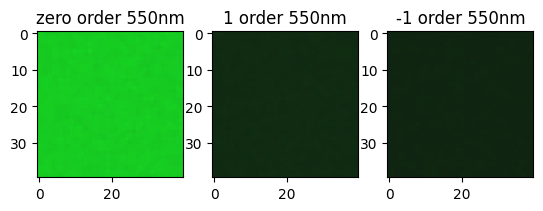

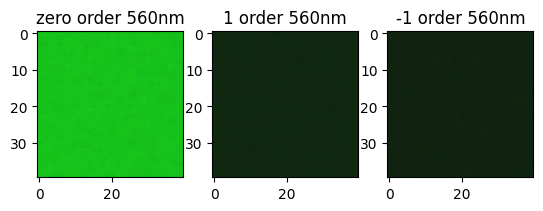

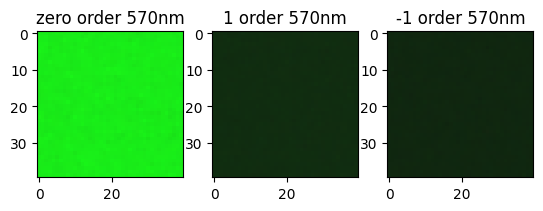

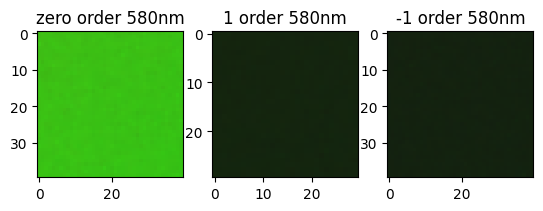

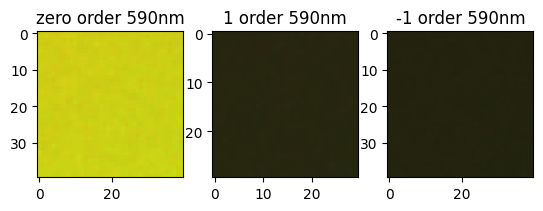

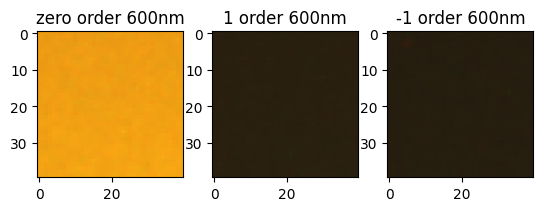

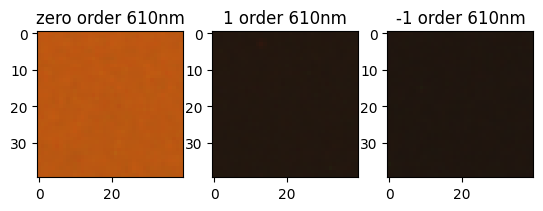

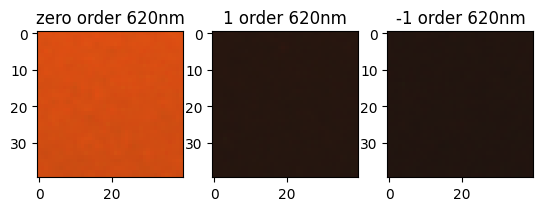

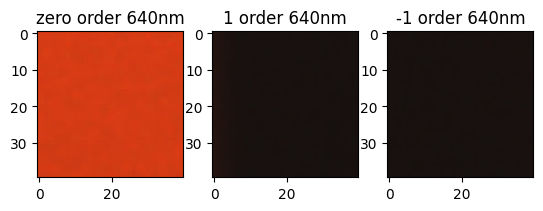

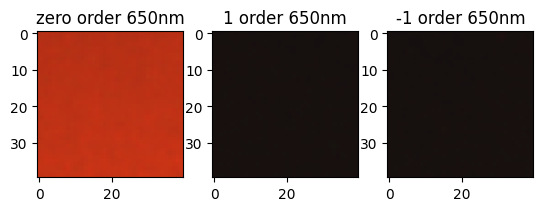

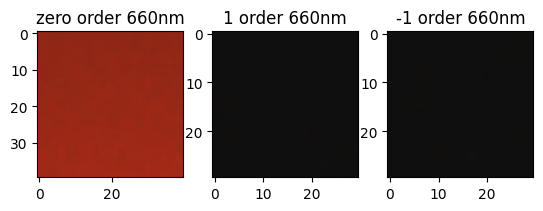

In [7]:
for w in range(len(wvls)):
    plt.figure()
    plt.subplot(131), plt.imshow(zero[w, zero_center[w,1]-p_size:zero_center[w,1]+p_size, zero_center[w,0]-p_size : zero_center[w,0]+p_size]), plt.title("zero order %dnm"%wvls[w])
    plt.subplot(132), plt.imshow(pfirst[w, pfirst_center[w,1]-patch_size[w,2]:pfirst_center[w,1]+patch_size[w,2], pfirst_center[w,0]-patch_size[w,2] : pfirst_center[w,0]+patch_size[w,2]]), plt.title("1 order %dnm"%wvls[w])
    plt.subplot(133), plt.imshow(mfirst[w, mfirst_center[w,1]-patch_size[w,0]:mfirst_center[w,1]+patch_size[w,0], mfirst_center[w,0]-patch_size[w,0] : mfirst_center[w,0]+patch_size[w,0]]), plt.title("-1 order %dnm"%wvls[w])

### Data save

In [8]:
rgb_intensity = np.zeros(shape=(3, len(wvls), 3)) # order, wvls, rgb

for w in range(len(wvls)):
    rgb_intensity[1,w] = zero[w, zero_center[w,1]-p_size:zero_center[w,1]+p_size, zero_center[w,0]-p_size : zero_center[w,0]+p_size].mean(axis = (0,1))
    rgb_intensity[2,w] = pfirst[w, pfirst_center[w,1]-patch_size[w,2]:pfirst_center[w,1]+patch_size[w,2], pfirst_center[w,0]-patch_size[w,2] : pfirst_center[w,0]+patch_size[w,2]].mean(axis = (0,1))
    rgb_intensity[0,w] = mfirst[w, mfirst_center[w,1]-patch_size[w,0]:mfirst_center[w,1]+patch_size[w,0], mfirst_center[w,0]-patch_size[w,0] : mfirst_center[w,0]+patch_size[w,0]].mean(axis = (0,1))

In [29]:
w_idx = 0
rgb_intensity[1, w_idx]*255,rgb_intensity[2,w_idx]*255,rgb_intensity[0,w_idx]*255

(array([16.55875 , 16.638125, 44.775   ]),
 array([14.831875, 14.813125, 22.639375]),
 array([14.6275  , 14.606875, 20.35625 ]))

### Diffraction Efficiency for each order

In [9]:
# ratio of first orders (+1, -1)
mfirst_order_rgb = (rgb_intensity[0] * 255.) / (rgb_intensity[1] * 255.)
pfirst_order_rgb = (rgb_intensity[2] * 255.) / (rgb_intensity[1] * 255.)

In [11]:
mfirst_order_efficiency = []
pfirst_order_efficiency = []

for w in range(len(wvls)):
    max_idx = np.argmax(rgb_intensity[1, w])
    mfirst_order_efficiency.append(mfirst_order_rgb[w, max_idx])
    pfirst_order_efficiency.append(pfirst_order_rgb[w, max_idx])

pfirst_order_efficiency = np.array(pfirst_order_efficiency)
mfirst_order_efficiency = np.array(mfirst_order_efficiency)

In [13]:
pfirst_order_efficiency

array([0.50562535, 0.30902798, 0.30988484, 0.2881352 , 0.28367027,
       0.26824593, 0.27930021, 0.28714092, 0.2779017 , 0.2226384 ,
       0.22714835, 0.21921726, 0.21356164, 0.21042421, 0.20549653,
       0.18886752, 0.18973761, 0.18293895, 0.17128075, 0.18442416,
       0.17775956, 0.11540502, 0.11906096, 0.10378416])

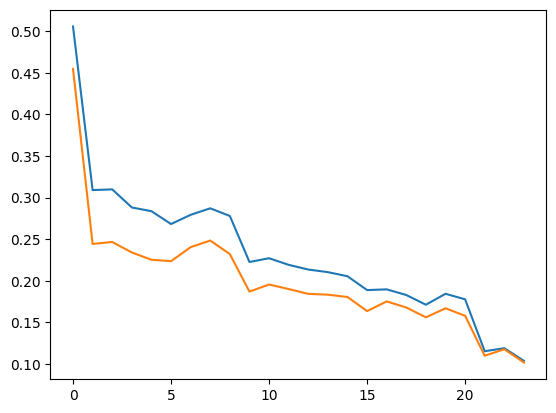

In [12]:
plt.plot(pfirst_order_efficiency)
plt.plot(mfirst_order_efficiency)

### Interpolation

In [20]:
from scipy import interpolate
import torch

In [21]:
def cubic_interpolation(x_new, x_points, y_points, n):
    tck = interpolate.splrep(x_points, y_points, k=n)   # Estimate the polynomial of nth degree by using x_points and y_points
    y_new = interpolate.splev(x_new, tck)
    return y_new

In [22]:
wvls = torch.tensor(wvls)*1e-9
new_wvls = torch.linspace(420*1e-9, 660*1e-9, 25) # 400 ~ 680 까지 10nm 간격으로

mfirst_dg_efficiency = cubic_interpolation(new_wvls, wvls, mfirst_order_efficiency, 4)
pfirst_dg_efficiency = cubic_interpolation(new_wvls, wvls, pfirst_order_efficiency, 4)

In [23]:
import matplotlib.pyplot as plt

(<AxesSubplot:title={'center':'order m = 1'}>,
 Text(0.5, 1.0, 'order m = 1'))

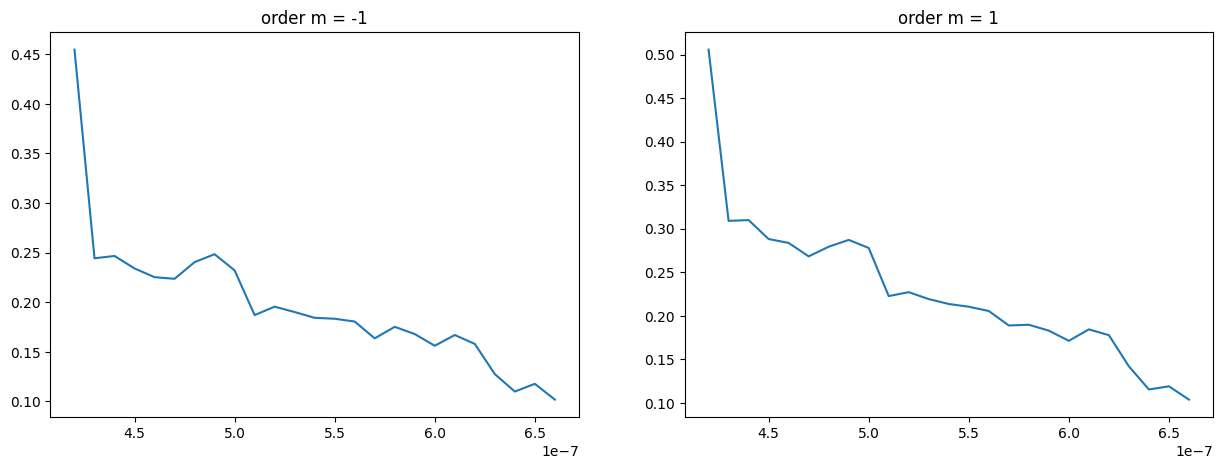

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.plot(new_wvls, mfirst_dg_efficiency), plt.title('order m = -1')
plt.subplot(122), plt.plot(new_wvls, pfirst_dg_efficiency), plt.title('order m = 1')

In [51]:
ones = np.ones(shape=(len(new_wvls)))

In [52]:
dg_efficiency = np.concatenate((mfirst_dg_efficiency[:,np.newaxis], ones[:,np.newaxis], pfirst_dg_efficiency[:,np.newaxis]), axis = 1)

In [53]:
dg_efficiency.shape

(25, 3)

In [54]:
np.save('./dg_efficiency.npy', dg_efficiency)

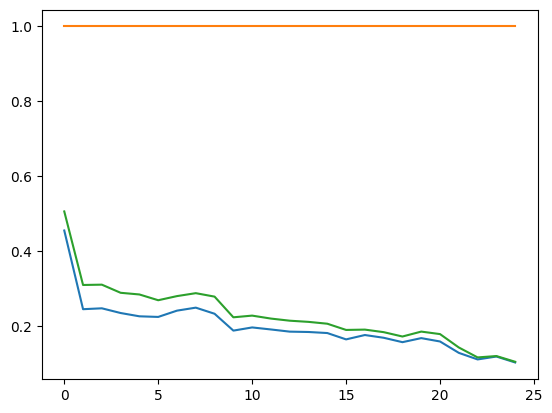

In [55]:
plt.plot(dg_efficiency)